# Project 2: quasielastic neutron scattering from a switchable dielectric

In [1]:
from scipy.optimize import curve_fit
from scipy.constants import Boltzmann, elementary_charge
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from pylab import loglog, xlabel, ylabel, title, legend, figure, plot, axes
from scipy.integrate import trapz                                         

To prove that the scattering from the data files are showing quasi-elastic interactions, we plot the scattered intensities against the energy of the lowest temperature file (in Blue), and the highest (in Red). Both show that, as there is a steep peak centered around 0, the interaction is quasi-elastic. Plotting the largest temperature data set alongside shows the difference in scattering. The lower peak and wider base in the Red line of Fig 1 shows the experimental consequenses of the idea explored in the conclusion under Fig5. Most of this change occurs around 195K, as shown in Fig6.

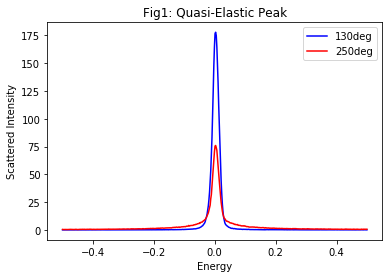

In [2]:
data130 = np.loadtxt('data/data_130K.txt')
data250 = np.loadtxt('data/data_250K.txt')
#print(data)
E = np.linspace(-0.499, 0.499, 500)
figure()
plt.xlabel("Energy")
plt.ylabel("Scattered Intensity")
plt.title("Fig1: Quasi-Elastic Peak")
plot(E, data130, 'b-', label="130deg")
plot(E, data250, 'r-', label="250deg")
plt.legend()

## Integration over a suitable window
While elastic scattering is centered around $E = 0$, quasi-elastic scattering occurs $E \neq 0$. This means that the scattering peak will have a finite width, which we integrate over (centered at 0) with:

$$ S_\text{elastic} \approx \int_{-L}^L S(E)\,\mathrm{d}E $$

By eye analysis of Figure 1 above gives the cut off (limits of intergration) to be $L = 0.02$.

In [3]:
L = 0.02
data130[abs(E) < L]                               #test for larger than L then only use them going forward as in the code above.

E_large_L = data130[abs(E) < 0.02]                #provides E values which are greater than 0.02 named E_large_L.

print("The intergral is:", trapz(E_large_L, None, 0.04/20))

#gives us a value of the integral, with steps of assuming equidistant E values, as there are 20 values over a range of 0.04.

The intergral is: 4.249779856


## Scattering as a Function of Temperature
At higher temperature, it is easier for molecules to overcome the rotation eneryy barrier, so it is expected that at higher temperatures, there will be more quasi-elastic scattering, and less elastic scattering (assuming the total scattering is constant). 

Text(0.5, 1.0, 'Fig2: Quasi-Elastic Scattering as a Function of Temperature')

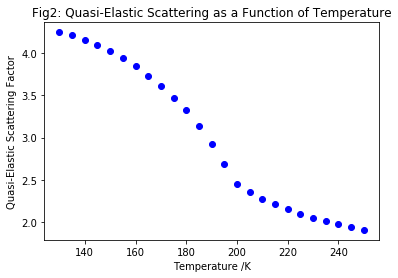

In [4]:
temp_intergrals = []
temp_range = []
E = np.linspace(-0.499, 0.499, 500)
for temp in range(130, 251, 5):                                      #looping over the full range of temps 130-250K in 5K steps.
    n_data = np.loadtxt('data/data_'+str(temp)+'K.txt')              #loading each dataset per loop.
    temp_intergrals.append(trapz(n_data[abs(E) < 0.02], None, 0.002))#appending the intergrated T values where |E| > L.
    temp_range.append(temp)                                          #forming a list of temperatures, in 5K steps 130-250K.

temp_range = np.array(temp_range)                                    #list =>> array to use later in plots etc. 

figure()
plt.plot(temp_range, temp_intergrals, 'bo')                     
plt.xlabel("Temperature /K")
plt.ylabel("Quasi-Elastic Scattering Factor")
plt.title("Fig2: Quasi-Elastic Scattering as a Function of Temperature")

## Fit as a Function of Temperature
After finding the elastic componant at each temperature in the range, we will use:

$$ S_\text{elastic}(T) = \frac{2A}{\pi}\tan^{-1}\left\{\frac{L}{\lambda_0}\exp\left(\frac{E}{k_\mathrm{B}T}\right)\right\} $$.

as a model showing the decreasing elastic scattering with temperature. Here, $E$ represents the rotation energy barrier, $\lambda_0$ is a measure of how fast the molecule would rotate in the high-temperature limit, $A$ is a scale factor, $k_\mathrm{B}$ is the Boltzmann constant and $e$ is the elementary charge. $L = 0.02$ is the same value as used above. 

To find the closest fit, this E value will be found for high temperatures, adnd low temperatures. The transition point will then be found from the point of intersection of the high and low temperature relationships. First, the function ews (Elastic Window Scan) will be used to find an array of $S_{elastic}$ factors, each for a corresponding temperature. Then for each vallue of temperature, the intergral is found with the trapz method (the experimental data), and plotted with the calculated factors from ews (modelled data).  

In [5]:
L = 0.02 
def ews(T, E, lam0, A):
    param = (E, lam0, A)
    return ((2*A)/np.pi)*np.arctan((L/lam0)*np.exp(E/(Boltzmann*T))) 

Using the variables $E = 9e-21$, $\lambda_0 = 4.49e-1$ and $A = 4.8$, Fig 3 is found. Note, the straight line fits neither the high temperature or low temperature very well. Here, we look for better variables, and plot $E =  3.05e-21$, $\lambda_0 = 4.499e-1$ and $A = 28$ to find Fig4. This gives a much more accurate fit for the higher temperatures, but a very bad fit for the lower temperatures. So, to find Fig 5, we optimise using the curve_fit function to find the best variables to fit at lower temperatures. Then, we join these with the higher temperature data from Fig 4. This gives us a strong fit in Fig5 and6.

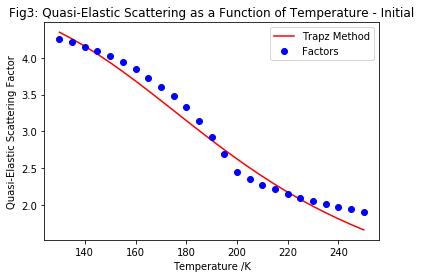

In [6]:
elastic_factors = ews(temp_range, 9e-21, 4.49e-1, 4.8)     #first guess.

files = []                                                 #making a file of file names which I loop through later.
for temp in range(130, 255, 5):                            #looping over the full range of temps 130-250K in 5K steps.
    files.append('data/data_'+str(temp)+'K.txt')           #remake files list as we edited the 'temp_range' list earlier.

E = np.linspace(-0.499, 0.499, 500)                        #E in a range of -0.499 to 0.499 in 500 steps, step size = 0.001996.
L = 0.02
factors = []                                               #List to fill later recording the factors; one for each dataset.
for i in files:                                            #looping through each temperature dataset.
    data = np.loadtxt(i)                                   #loading each element.
    factor = trapz(data[abs(E) < L], E[abs(E) < 0.02])     #executing trapz on E above L in each dataset at |E|<0.02.      
    factors.append(factor)                                 #forming the list of factors to use and plot later.
factors = np.array(factors)                                #list to array as we will need to use each element. 

#There is now an array of factors which we use in all following plots. It is considered to be the experimental 
#data to which we fit our models.
       

plt.figure() 
plt.plot(temp_range, elastic_factors, 'r-', label="Trapz Method")
plt.plot(temp_range, factors, 'bo', label="Factors")
plt.xlabel("Temperature /K")
plt.ylabel("Quasi-Elastic Scattering Factor")
plt.title("Fig3: Quasi-Elastic Scattering as a Function of Temperature - Initial")
plt.legend()

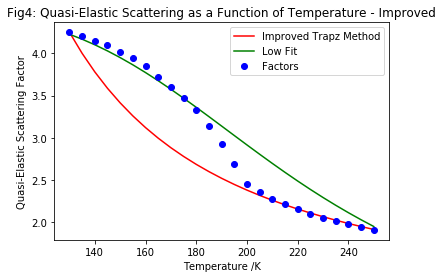

In [7]:
#print(temp_range, files)                                          #testing we still had the list of temperatures and files.

elastic_factors = ews(temp_range, 3.05e-21, 4.499e-1, 28)          #new values, varied and found closest fit at the higher T. 

elastic_factors_lowT = ews(temp_range, 9.6e-21, 4e-1, 4.5)         #new values for low T.

plt.figure()
plt.plot(temp_range, elastic_factors, 'r-', label="Improved Trapz Method")
plt.plot(temp_range, elastic_factors_lowT, 'g', label = 'Low Fit')
plt.plot(temp_range, factors, 'bo', label="Factors")
plt.xlabel("Temperature /K")
plt.ylabel("Quasi-Elastic Scattering Factor")
plt.title("Fig4: Quasi-Elastic Scattering as a Function of Temperature - Improved")
plt.legend()

The red line on Fig 4 fits for large T ($T > 200K$), but the red line does not hold true for low T. In fact, if extrapolated the red line suggests that  as the temperature decreases, the scattering factor will increase, something which obviously is not happening to the (blue) experimental data. So, we will search for a better fit, first finding paramaters which fit the lower T values, which were found in the green line. These fit the Lower T values very well, but fail at around $T \approx 180K$

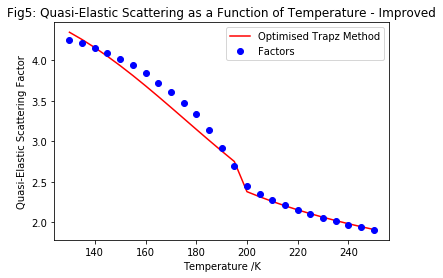

In [8]:
separated_factors = []
#NOTE: we use 2.7 and 2.4 as they are the only combination that gave us len(optimised_factors)=25 which needs to be true to  
#plot one-for-one with the 25 temperatures in temp_range.

elastic_factors = ews(temp_range, 9e-21, 4.49e-1, 4.8)   #values from Fig4 where they fitted aproximately for T<200.
for t in elastic_factors[elastic_factors > 2.7]:         #we loop over the values in elastic_factors that are>2.7 then add the
    separated_factors.append(t)                          #optimised values to the list making our optimised values where T<200.
    
elastic_factors = ews(temp_range, 3.05e-21, 4.499e-1, 28)#values from Fig 4 where they fitted aproximately for T>200.
for t in elastic_factors[elastic_factors < 2.4]:         #we loop over the values in elastic_factors that are<2.4 then add the
    separated_factors.append(t)                          #optimised values to the list making our optimised values where T>200. 
    
plt.figure() 
plt.plot(temp_range, separated_factors, 'r-', label="Optimised Trapz Method" )
plt.plot(temp_range, factors, 'bo', label="Factors")
plt.ylabel("Quasi-Elastic Scattering Factor")
plt.xlabel("Temperature /K")
plt.title("Fig5: Quasi-Elastic Scattering as a Function of Temperature - Improved")
plt.legend()

This is a strong approximation, and it can already be seen that the material's dielectic behavior changes at T~195K, at this point the two (High and Low) curves intersect. But, this fitted curve (in red) is not perfect. If for example, we needed to predict the scattering factor for $T < 135K$ it is obvious that this fit would predict a disproportionately large factor. So, this fit needs improving. To do this, we begin by breaking the data around 190K, where we believe (from Fig5) the two curves intersect, then optimising each independently, from the improved guesses used in Fig4 (Low T data = Green, High T data = Red). Regenerating new data which then can be put together in an append function gives us a very accurate fit in Fig6, which is our final result.

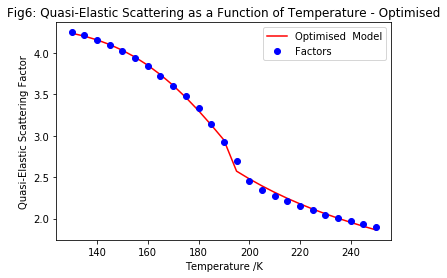

In [9]:
low_temp = temp_range[temp_range < 192.5]                             #separating the data into the greater and less than 92.5K.
high_temp = temp_range[temp_range > 192.5]
low_E = factors[temp_range < 192.5]
high_E = factors[temp_range > 192.5]

optimised_low, covarience_low = curve_fit(ews, low_temp, low_E, p0 = (9e-21, 4.49e-1, 4.8))         #optimising the low T data.
optimised_high, covarience_high = curve_fit(ews, high_temp, high_E, p0 = (3.05e-21, 4.499e-1, 28))  #optimising the high T data.
#print("optimised for low T are:", optimised_low)
#print("optimised for high T are:", optimised_high)


elastic_factors_low_temp = ews(low_temp, optimised_low[0], optimised_low[1], optimised_low[2])      #using the optimised low T.
elastic_factors_high_temp = ews(high_temp, optimised_high[0], optimised_high[1], optimised_high[2]) #using the optimised high T.

model_values =[]                                                                       #placing all the data back into one list.
for i in (elastic_factors_low_temp):                                                   #appending the low T data.
    model_values.append(i)
for i in (elastic_factors_high_temp):                                                  #appending the high T data.
    model_values.append(i)                 

plt.figure()                            
plt.plot(temp_range, model_values, 'r-', label="Optimised  Model" )
plt.plot(temp_range, factors, 'bo', label="Factors")
plt.ylabel("Quasi-Elastic Scattering Factor")
plt.xlabel("Temperature /K")
plt.title("Fig6: Quasi-Elastic Scattering as a Function of Temperature - Optimised")
plt.legend()

The material's dielectic behavior changes at T~192.5K, at this point the two (high and low) curves intersect. This represents the point in the energy gradient where most molecules can exceed the neccessary E value because the ambient temperature gives them enough energy. This causes a fall in scattering, as Fig7 represents, in a 10K range, the peak intensity falls by $\approx 22K$ (117 at 190K  to 95 at 200K). 

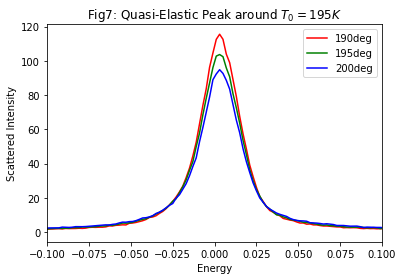

In [10]:
data190 = np.loadtxt('data/data_190K.txt')
data195 = np.loadtxt('data/data_195K.txt')
data200 = np.loadtxt('data/data_200K.txt')

#print(data)
E = np.linspace(-0.499, 0.499, 500)
figure()
plt.xlabel("Energy")
plt.ylabel("Scattered Intensity")
plt.title("Fig1: Quasi-Elastic Peak")
plot(E, data190, 'r-', label="190deg")
plot(E, data195, 'g-', label="195deg")
plot(E, data200, 'b-', label="200deg")
plt.xlim(-0.1,0.1)
plt.title("Fig7: Quasi-Elastic Peak around $T_0 =195K$")
plt.legend()